In [1]:
from mainIngModel import *
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import copy

In [2]:
sampleIdArr = []
allIngData = []
mainIngData =[]

with open('./labelledData/mainIngredients.csv', encoding='utf-8') as f:
    r = csv.reader(f)
    for i, recipe in enumerate(r):
        if i == 0:
            continue
        sampleIdArr.append(recipe[1])
        allIngData.append(oneHotEncoding(recipe[2].split('/')))
        mainIngData.append(list(map(int, (recipe[3].split('/')))))

train_all = []
train_main = []
for i, mainIngArr in enumerate(mainIngData):
    for mainIng in mainIngArr:
        train_all.append(allIngData[i])
        train_main.append(mainIng)

ingNameArr = loadIngNameData()

In [3]:
pipeline = createPipeline(modelType='svm')
pipeline.fit(train_all, train_main)

Pipeline(steps=[('pca', PCA(n_components=0.9)),
                ('model', SVC(probability=True))])

In [4]:
recipeMat = []
weight = 10

for sampleIdx, sample in enumerate(allIngData):
    temp_sample = [*sample]
    for mainIdx in mainIngData[sampleIdx]:
        temp_sample[mainIdx] *= weight
    recipeMat.append(temp_sample)

In [5]:
def getSimilarArr(pipeline, train_main, rawData, _recipeMat, sampleIdArr, ingNameArr, weight=3, k=0.55):
    recipeMat = copy.deepcopy(_recipeMat)

    sample = createSample(createIndexedData(rawData, ingNameArr))

    result = pipeline.predict_proba([sample])[0]

    parsed_train_main = sorted(list(set(train_main)))

    predictedMainIngArr = []
    idx = np.argmax(result)
    for mainIdArr in np.where(result > k*result[idx]):
        for mainId in mainIdArr:
                predictedMainIngArr.append(parsed_train_main[mainId])

    temp_sample = [*sample]
    for mainIdx in predictedMainIngArr:
        temp_sample[mainIdx] *= weight
    recipeMat.append(temp_sample)

    cosineResult = cosine_similarity(recipeMat)
    sortedArr = sorted(cosineResult[-1], reverse=True)
    print(sortedArr[1:20])
    for value in sortedArr[1:20]:
        for j in np.where(cosineResult[-1] == value)[0]:
            print(sampleIdArr[j])
    plt.plot(sortedArr)
    plt.ylabel('cosine similarity')
    plt.show()

[0.9901475429766744, 0.9853292781642932, 0.9853292781642932, 0.9805806756909202, 0.9759000729485332, 0.9759000729485332, 0.9712858623572641, 0.9712858623572641, 0.9712858623572641, 0.9667364890456636, 0.9534625892455924, 0.949157995752499, 0.936585811581694, 0.7071067811865475, 0.7053456158585982, 0.7035975447302919, 0.7035975447302919, 0.7035975447302919, 0.7035975447302919]
6903714
6903176
6903972
6903176
6903972
6902354
6901526
6901688
6901526
6901688
6900236
6903672
6903964
6900236
6903672
6903964
6900236
6903672
6903964
6900327
6901517
6901809
6901777
6902353
6902534
6902230
6903054
6903512
6903985
6902230
6903054
6903512
6903985
6902230
6903054
6903512
6903985
6902230
6903054
6903512
6903985


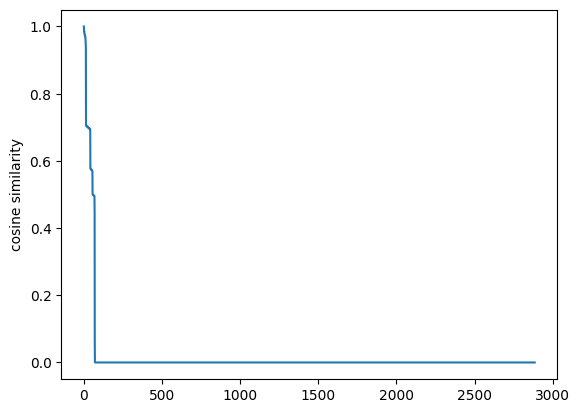

In [6]:
rawData = ['식빵']
getSimilarArr(pipeline, train_main, rawData, recipeMat, sampleIdArr, ingNameArr, 10, 0.35)